4.10.4

## Outline

1.  Outline
2.  Import
3.  Splitting the Data
4.  Segment 0
5.  Segment 1
6.  Segment 2
7.  Segment 3
8.  Conjugated Charts
9.  Finding all means and concating the df together
10. Top 100 Products for Each Segment

## Import

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#poc segmented data
df = pd.read_pickle ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/POC Df with Segments; pkl.pkl')

## Splitting the Data

In [3]:
df['Segment'].min()

0

In [4]:
df0 = df[df['Segment'] == 0]

In [5]:
df1 = df[df['Segment'] == 1]
df2 = df[df['Segment'] == 2]
df3 = df[df['Segment'] == 3]

In [6]:
#finding the column index numbers to get means for

In [7]:
df2['order_amount'].head(2)

335    Most Orders
336    Most Orders
Name: order_amount, dtype: object

In [8]:
df2.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days_2', 'order_amount', 'loyalty_flag', 'spend_flag',
       'order_freq', 'order_freq_flag', 'first_name', 'last_name', 'gender',
       'state', 'age', 'n_dependants', 'martial_status', 'income', 'Segment'],
      dtype='object')

In [9]:
column_index_numbers = [df.columns.get_loc(col) for col in [ 'order_dow', 'order_hour_of_day',
                                                             'days_since_prior_order',
                                                             'prices',
                                                             'age', 'n_dependants', 'income']]

print("Column Index Numbers: ", column_index_numbers)

Column Index Numbers:  [3, 4, 5, 11, 24, 25, 27]


## Segment 0

In [10]:
#finding df0 parameters
print (df0['age'].median())
print (df0['age'].max())
print (df0['age'].min())
print (df0['income'].median())
print (df0['income'].max())
print (df0['income'].min())

61.0
81
18
147847.0
249904
124857


In [11]:
df0_means = np.mean(df0.iloc[:, column_index_numbers], axis=0)

In [12]:
df0_means

order_dow                      2.739441
order_hour_of_day             13.469846
days_since_prior_order        11.045153
prices                        16.043300
age                           60.609597
n_dependants                   1.494974
income                    148449.727468
dtype: float64

## Segment 1

In [13]:
#finding df1 parameters
print (df1['age'].median())
print (df1['age'].max())
print (df1['age'].min())
print (df1['income'].median())
print (df1['income'].max())
print (df1['income'].min())

34.0
81
18
58286.0
79066
25903


In [14]:
df1_means = np.mean(df1.iloc[:, column_index_numbers], axis=0)

## Segment 2

In [15]:
#finding df2 parameters
print (df2['age'].median())
print (df2['age'].max())
print (df2['age'].min())
print (df2['income'].median())
print (df2['income'].max())
print (df2['income'].min())

52.0
81
18
99923.0
124856
79067


In [16]:
df2_means = np.mean(df2.iloc[:, column_index_numbers], axis=0)

## Segment 3

In [17]:
#finding df3 parameters
print (df3['age'].median())
print (df3['age'].max())
print (df3['age'].min())
print (df3['income'].median())
print (df3['income'].max())
print (df3['income'].min())

55.0
81
18
320962.0
593901
250190


In [18]:
df3_means = np.mean(df3.iloc[:, column_index_numbers], axis=0)

## Conjugated Charts

In [19]:
import matplotlib as mpl
cmap = mpl.colormaps['rainbow']

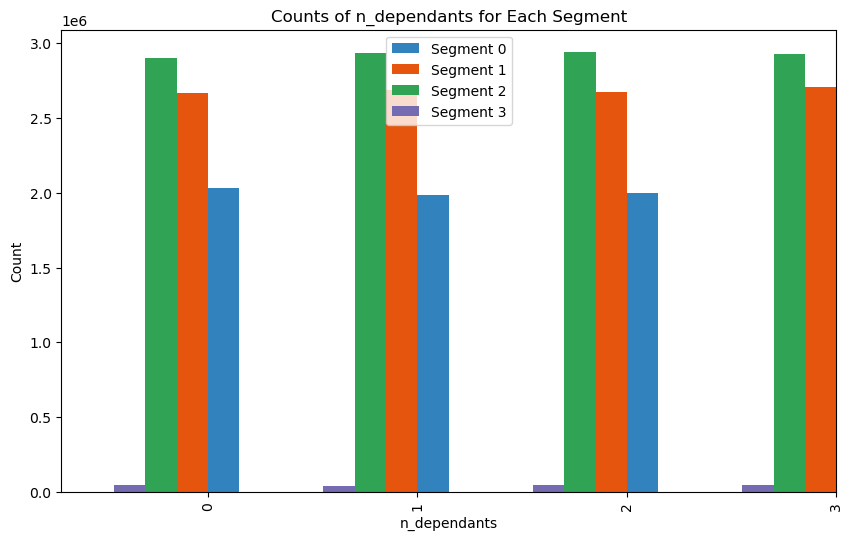

In [20]:
from matplotlib.cm import get_cmap

# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

cmap = get_cmap('tab20c')

# Plot bar chart for each segment on the same axes with tab20c colors
df0['n_dependants'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(0), position=0, width=0.15)
df1['n_dependants'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(4), position=1, width=0.15)
df2['n_dependants'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(8), position=2, width=0.15)
df3['n_dependants'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(12), position=3, width=0.15)

# Set x-axis label, y-axis label, and title
ax.set_xlabel('n_dependants')
ax.set_ylabel('Count')
ax.set_title('Counts of n_dependants for Each Segment')

# Set x-ticks and x-tick labels
ax.set_xticks(range(4))
ax.set_xticklabels(df0['n_dependants'].value_counts().sort_index().index)

ax.legend(['Segment 0', 'Segment 1', 'Segment 2', 'Segment 3'])
plt.show()


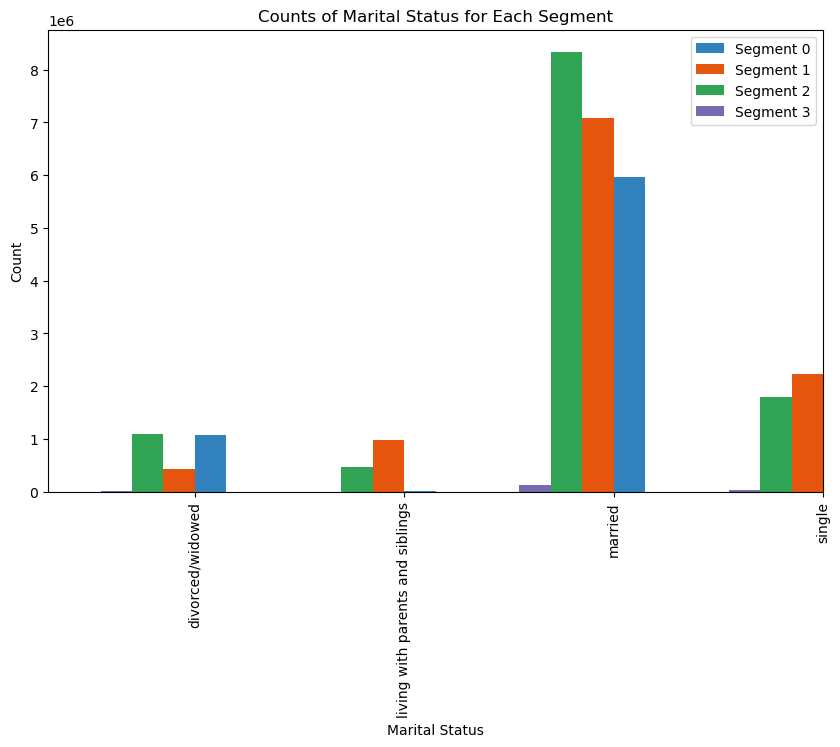

In [21]:
from matplotlib.cm import get_cmap

# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

cmap = get_cmap('tab20c')

# Plot bar chart for each segment on the same axes with tab20c colors
df0['martial_status'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(0), position=0, width=0.15)
df1['martial_status'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(4), position=1, width=0.15)
df2['martial_status'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(8), position=2, width=0.15)
df3['martial_status'].value_counts().sort_index().plot.bar(ax=ax, color=cmap(12), position=3, width=0.15)

# Set x-axis label, y-axis label, and title
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.set_title('Counts of Marital Status for Each Segment')

# Set x-ticks and x-tick labels
ax.set_xticks(range(4))
ax.set_xticklabels(df0['martial_status'].value_counts().sort_index().index)

ax.legend(['Segment 0', 'Segment 1', 'Segment 2', 'Segment 3'])
plt.show()

## Top 100 Products for Each Segment

In [22]:
df2['product_name'].head(2)

335                   Soda
336    Organic Half & Half
Name: product_name, dtype: object

In [23]:
df2.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days_2', 'order_amount', 'loyalty_flag', 'spend_flag',
       'order_freq', 'order_freq_flag', 'first_name', 'last_name', 'gender',
       'state', 'age', 'n_dependants', 'martial_status', 'income', 'Segment'],
      dtype='object')

In [24]:
column_index_numbers = [df.columns.get_loc(col) for col in [ 'order_dow', 'order_hour_of_day',
                                                             'days_since_prior_order',
                                                             'prices',
                                                             'age', 'n_dependants', 'income']]

print("Column Index Numbers: ", column_index_numbers)

Column Index Numbers:  [3, 4, 5, 11, 24, 25, 27]


In [25]:
df0_means = np.mean(df0.iloc[:, column_index_numbers], axis=0)

### df0

In [26]:
df0u = df0.groupby('product_name', as_index=False).agg(product_name_count=('product_name', 'count'))

In [27]:
df0u = df0u.sort_values('product_name_count', ascending=False)

In [28]:
t0_100 = df0u.head(100)

### df1

In [29]:
df1u = df1.groupby('product_name', as_index=False).agg(product_name_count=('product_name', 'count'))

In [30]:
df1u = df1u.sort_values('product_name_count', ascending=False)

In [31]:
t1_100 = df1u.head(100)

### df2

In [32]:
df2_means = np.mean(df2.iloc[:, column_index_numbers], axis=0)

In [33]:
df2u = df2.groupby('product_name', as_index=False).agg(product_name_count=('product_name', 'count'))

In [34]:
df2u = df2u.sort_values('product_name_count', ascending=False)

In [35]:
t2_100 = df2u.head(100)

### df3

In [36]:
df3_means = np.mean(df3.iloc[:, column_index_numbers], axis=0)

In [37]:
df3u = df3.groupby('product_name', as_index=False).agg(product_name_count=('product_name', 'count'))

In [38]:
df3u = df3u.sort_values('product_name_count', ascending=False)

In [39]:
t3_100 = df3u.head(100)

### Concatting the top 100 products

In [40]:
# Concatenate DataFrames horizontally along columns axis and select 'product_name' column
top_100 = pd.concat([df['product_name'] for df in [t0_100, t1_100, t2_100, t3_100]], axis=1)


In [41]:
top_100

,product_name,product_name,product_name,product_name
3439,Banana,NaN,NaN,NaN
3244,Bag of Organic Bananas,NaN,NaN,NaN
30231,Organic Strawberries,NaN,NaN,NaN
27251,Organic Baby Spinach,NaN,NaN,NaN
28653,Organic Hass Avocado,NaN,NaN,NaN
...,...,...,...,...
6681,NaN,NaN,NaN,Lemon Sparkling Water
10763,NaN,NaN,NaN,Purified Water
14066,NaN,NaN,NaN,White Corn Tortillas
13674,NaN,NaN,NaN,Vanilla Almond Breeze Almond Milk


## Export